# Notebook that explore the LMC orbital histories

In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D

font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


## To-Do:

1. Interpolate orbit to find the best observable value!

|`Simulation`| `ICs` | Time (Gyrs) | Coordinates (kpc $\&$ km/s)|
|--------|---------|---------|--------|
| LMC3 | r=(24.33628 277.752518 58.543234), v=(4.336299 -58.767378 -77.49269) | 1.88  | r=(-0.21$\hat{x}$, -41.45$\hat{y}$, -28.11$\hat{z}$), v=(-72.23, -263.41, 218.57) |
| LMC4 (need to be improved) | r=(25, 308, 88.6), v=(6, -37, -68.6) | 1.42 | r = (-1.23$\hat{x}$, -43.04$\hat{y}$, -26.82$\hat{z}$), v=(-58$\hat{x}$, -225.28$\hat{y}$, 226.16)$\hat{z}$ | 
| LMC5 |  r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 2.32 | r = (-0.79$\hat{x}$, -43.96$\hat{y}$, -28.28$\hat{z}$), v=(-62.34$\hat{x}$, -239.11$\hat{y}$, 225.07)$\hat{z}$  | 
| LMC6 | r=(11.584929 247.791118 129.901859),v=(11.910111 11.210542 -77.135969) | 2.38 | r = (-1.18$\hat{x}$, -44.96$\hat{y}$, -27.3$\hat{z}$), v=(-66.8$\hat{x}$, -245.39$\hat{y}$, 229.84)$\hat{z}$ | 


In [2]:
#Nbody1 = loadtxt('LMCMW-H6.txt')
# Function that reads the data from the Analytic integration
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]
    
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#Function that reads the N-body simulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    #time = data[:,0]
    #Rgal = data[:,1]
    x_sat= data[:,6]
    y_sat = data[:,7]
    z_sat = data[:,8]
    x_gal = data[:,0]
    y_gal = data[:,1]
    z_gal = data[:,2]
    #Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,3]
    vy_gal = data[:,4]
    vz_gal = data[:,5]
    Rgal= np.sqrt((x_sat-x_gal)**2 + (y_sat-y_gal)**2 + (z_sat-z_gal)**2)
    Vgal= np.sqrt((vx_sat-vx_gal)**2 + (vy_sat-vy_gal)**2 + (vz_sat-vz_gal)**2)

    return Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

    
def best_values(x, y, z, vx, vy, vz):
    """
    Computes the closes value of the N-body orbit to the observed present day LMC positions
    and velocities.
    
    """
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    
    sigma_vx = 13
    sigma_vy = 15
    sigma_vz = 19
    
    dx = x_obs - x[index]
    dy = y_obs - y[index]
    dz = z_obs - z[index]
    
    dvx = vx_obs - vx[index]
    dvy = vy_obs - vy[index]
    dvz = vz_obs - vz[index]
    t = np.linspace(0, 3, 151)

    print('Dr = ', dx, dy, dz, (dx**2 + dy**2 + dz**2)**0.5)
    print('Dv = ', dvx, dvy, dvz, (dvx**2 + dvy**2 + dvz**2)**0.5)
    return t[index], x[index], y[index], z[index], vx[index], vy[index], vz[index]
    

## LMC6

In [3]:
R_gal6,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC6_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-0.470554] [ 2.457576] [-1.42977] [ 2.88189922]
Dv =  [ 19.03294] [ 20.310012] [-15.77689] [ 31.9946816]


(array([ 2.3]),
 array([-0.529446]),
 array([-43.457576]),
 array([-26.57023]),
 array([-76.03294]),
 array([-246.310012]),
 array([ 236.77689]))

In [4]:
R_gal6,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC6_40Mb0_ic11_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [ 1.041708] [ 2.699152] [-0.435855] [ 2.92584119]
Dv =  [ 28.982098] [ 19.873106] [-5.022758] [ 35.49831608]


(array([ 2.26]),
 array([-2.041708]),
 array([-43.699152]),
 array([-27.564145]),
 array([-85.982098]),
 array([-245.873106]),
 array([ 226.022758]))

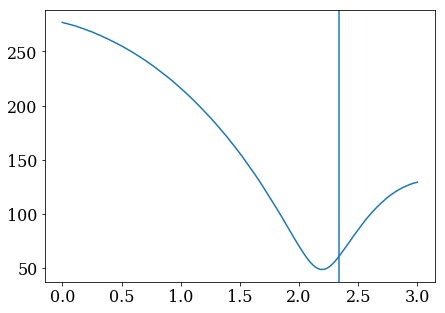

In [5]:
figure(figsize=(7,5))
plot(linspace(0, 3, 151), R_gal6)
axvline(2.34)

In [6]:
orbit6_b1 = reading_Nbody('LMC6_40Mb1_ic20_orbit.txt')
R_gal6_b1 = orbit6_b1[0]
x_sat6_b1 = orbit6_b1[1]
y_sat6_b1 = orbit6_b1[2]
z_sat6_b1 = orbit6_b1[3]
x_gal6_b1 = orbit6_b1[4]
y_gal6_b1 = orbit6_b1[5]
z_gal6_b1 = orbit6_b1[6]
Vgal6_b1 = orbit6_b1[7]
vx_sat6_b1 = orbit6_b1[8]
vy_sat6_b1 = orbit6_b1[9]
vz_sat6_b1 = orbit6_b1[10]
vx_gal6_b1 = orbit6_b1[11]
vy_gal6_b1 = orbit6_b1[12]
vz_gal6_b1 = orbit6_b1[13]
best_values(x_sat6_b1-x_gal6_b1, y_sat6_b1-y_gal6_b1, z_sat6_b1-z_gal6_b1, vx_sat6_b1-vx_gal6_b1,
            vy_sat6_b1-vy_gal6_b1, vz_sat6_b1-vz_gal6_b1)

Dr =  [ 18.562584] [-8.357136] [-4.289602] [ 20.80413257]
Dv =  [ 38.753392] [-78.425716] [ 283.094091] [ 296.30167512]


(array([ 0.78]),
 array([-19.562584]),
 array([-32.642864]),
 array([-23.710398]),
 array([-95.753392]),
 array([-147.574284]),
 array([-62.094091]))

In [38]:
orbit6_b09 = reading_Nbody('LMC6_40Mb09_orbit.txt')
R_gal6_b09 = orbit6_b09[0]
x_sat6_b09 = orbit6_b09[1]
y_sat6_b09 = orbit6_b09[2]
z_sat6_b09 = orbit6_b09[3]
x_gal6_b09 = orbit6_b09[4]
y_gal6_b09 = orbit6_b09[5]
z_gal6_b09 = orbit6_b09[6]
Vgal6_b09 = orbit6_b09[7]
vx_sat6_b09 = orbit6_b09[8]
vy_sat6_b09 = orbit6_b09[9]
vz_sat6_b09 = orbit6_b09[10]
vx_gal6_b09 = orbit6_b09[11]
vy_gal6_b09 = orbit6_b09[12]
vz_gal6_b09 = orbit6_b09[13]
best_values(x_sat6_b09-x_gal6_b09, y_sat6_b09-y_gal6_b09, z_sat6_b09-z_gal6_b09, vx_sat6_b09-vx_gal6_b09,
            vy_sat6_b09-vy_gal6_b09, vz_sat6_b09-vz_gal6_b09)

Dr =  [ 6.591493] [-9.610721] [-0.058964] [ 11.65406431]
Dv =  [-72.73046] [-260.238906] [ 252.022418] [ 369.4987242]


(array([ 0.86]),
 array([-7.591493]),
 array([-31.389279]),
 array([-27.941036]),
 array([ 15.73046]),
 array([ 34.238906]),
 array([-31.022418]))

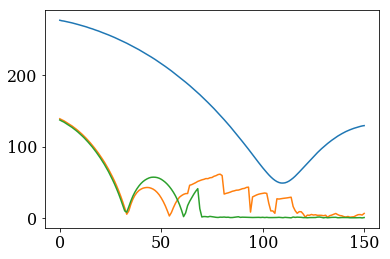

In [41]:
plot(R_gal6)
plot(R_gal6_b09)
plot(R_gal6_b1)

## LMC5

In [6]:
R_gal5, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC5_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-1.305432] [-0.93092] [ 1.911477] [ 2.49489661]
Dv =  [ 16.343265] [ 21.0018] [-2.988734] [ 26.77891792]


(array([ 2.24]),
 array([ 0.305432]),
 array([-40.06908]),
 array([-29.911477]),
 array([-73.343265]),
 array([-247.0018]),
 array([ 223.988734]))

In [20]:
orbit_b1 = reading_Nbody('LMC5_40Mb1_ic20_orbit.txt')
R_gal5_b1 = orbit_b1[0]
x_sat_b1 = orbit_b1[1]
y_sat_b1 = orbit_b1[2]
z_sat_b1 = orbit_b1[3]
x_gal_b1 = orbit_b1[4]
y_gal_b1 = orbit_b1[5]
z_gal_b1 = orbit_b1[6]
Vgal_b1 = orbit_b1[7]
vx_sat_b1 = orbit_b1[8]
vy_sat_b1 = orbit_b1[9]
vz_sat_b1 = orbit_b1[10]
vx_gal_b1 = orbit_b1[11]
vy_gal_b1 = orbit_b1[12]
vz_gal_b1 = orbit_b1[13]
best_values(x_sat_b1-x_gal_b1, y_sat_b1-y_gal_b1, z_sat_b1-z_gal_b1, vx_sat_b1-vx_gal_b1,
            vy_sat_b1-vy_gal_b1, vz_sat_b1-vz_gal_b1)

Dr =  [ 0.359211] [-2.231368] [-0.398055] [ 2.29488202]
Dv =  [ 25.261712] [ 30.972354] [-20.454015] [ 44.89774532]


(array([ 2.14]),
 array([-1.359211]),
 array([-38.768632]),
 array([-27.601945]),
 array([-82.261712]),
 array([-256.972354]),
 array([ 241.454015]))

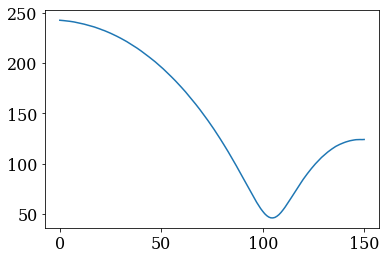

In [21]:
plot(R_gal5_b1)

In [7]:
R_gal5, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC5_40Mb0_ic11_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [ 0.042667] [-0.193831] [ 2.253626] [ 2.26234858]
Dv =  [ 16.943432] [ 20.045383] [-2.502844] [ 26.36591541]


(array([ 2.22]),
 array([-1.042667]),
 array([-40.806169]),
 array([-30.253626]),
 array([-73.943432]),
 array([-246.045383]),
 array([ 223.502844]))

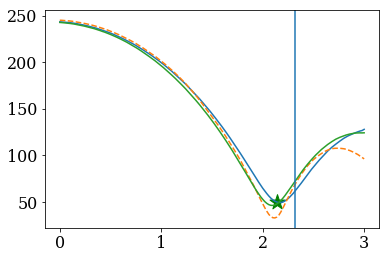

In [42]:
plot(np.linspace(0, 3, 151), R_gal5)
plot(np.linspace(0, 3, 151), R_gal5_b09, ls='--')
plot(np.linspace(0, 3, 151), R_gal5_b1)


#plot(t5_2, R_gal5_2)

axvline(2.32)
plt.scatter(2.14, 49.65, s=250, marker='*', c='green')


In [30]:
orbit5_b09 = reading_Nbody('LMC5_40Mb09_new_orbit.txt')
R_gal5_b09 = orbit5_b09[0]
x_sat5_b09 = orbit5_b09[1]
y_sat5_b09 = orbit5_b09[2]
z_sat5_b09 = orbit5_b09[3]
x_gal5_b09 = orbit5_b09[4]
y_gal5_b09 = orbit5_b09[5]
z_gal5_b09 = orbit5_b09[6]
Vgal5_b09 = orbit5_b09[7]
vx_sat5_b09 = orbit5_b09[8]
vy_sat5_b09 = orbit5_b09[9]
vz_sat5_b09 = orbit5_b09[10]
vx_gal5_b09 = orbit5_b09[11]
vy_gal5_b09 = orbit5_b09[12]
vz_gal5_b09 = orbit5_b09[13]
best_values(x_sat5_b09-x_gal5_b09, y_sat5_b09-y_gal5_b09, z_sat5_b09-z_gal5_b09, vx_sat5_b09-vx_gal5_b09,
            vy_sat5_b09-vy_gal5_b09, vz_sat5_b09-vz_gal5_b09)

Dr =  [ 0.643318] [-11.86839] [-11.641382] [ 16.6371366]
Dv =  [ 7.348068] [ 55.97946] [-105.529057] [ 119.68323156]


(array([ 2.14]),
 array([-1.643318]),
 array([-29.13161]),
 array([-16.358618]),
 array([-64.348068]),
 array([-281.97946]),
 array([ 326.529057]))

## LMC4

In [9]:
R_gal4, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal,\
vy_gal, vz_gal = reading_Nbody('LMC4_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-2.292964] [-3.654977] [ 0.639226] [ 4.36178297]
Dv =  [ 34.784986] [ 53.936385] [-2.998759] [ 64.25045862]


(array([ 2.3]),
 array([ 1.292964]),
 array([-37.345023]),
 array([-28.639226]),
 array([-91.784986]),
 array([-279.936385]),
 array([ 223.998759]))

In [10]:
R_gal4, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal,\
vy_gal, vz_gal = reading_Nbody('LMC4_40Mb0_ic11_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-1.220231] [-1.126895] [ 2.380497] [ 2.9026922]
Dv =  [ 28.3149] [ 42.558582] [ 0.867357] [ 51.12454178]


(array([ 2.3]),
 array([ 0.220231]),
 array([-39.873105]),
 array([-30.380497]),
 array([-85.3149]),
 array([-268.558582]),
 array([ 220.132643]))

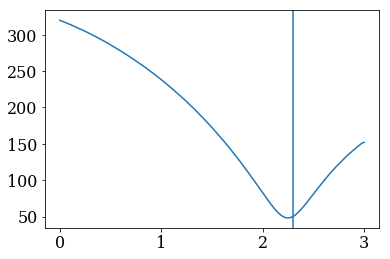

In [11]:
plot(np.linspace(0, 3, 151), R_gal4)
axvline(2.3)

In [22]:
orbit4_b1 = reading_Nbody('LMC4_40Mb1_ic20_orbit.txt')
R_gal4_b1 = orbit4_b1[0]
x_sat4_b1 = orbit4_b1[1]
y_sat4_b1 = orbit4_b1[2]
z_sat4_b1 = orbit4_b1[3]
x_gal4_b1 = orbit4_b1[4]
y_gal4_b1 = orbit4_b1[5]
z_gal4_b1 = orbit4_b1[6]
Vgal4_b1 = orbit4_b1[7]
vx_sat4_b1 = orbit4_b1[8]
vy_sat4_b1 = orbit4_b1[9]
vz_sat4_b1 = orbit4_b1[10]
vx_gal4_b1 = orbit4_b1[11]
vy_gal4_b1 = orbit4_b1[12]
vz_gal4_b1 = orbit4_b1[13]
best_values(x_sat4_b1-x_gal4_b1, y_sat4_b1-y_gal4_b1, z_sat4_b1-z_gal4_b1, vx_sat4_b1-vx_gal4_b1,
            vy_sat4_b1-vy_gal4_b1, vz_sat4_b1-vz_gal4_b1)

Dr =  [-1.526892] [-2.303024] [ 1.116379] [ 2.98020482]
Dv =  [ 38.95963] [ 49.878229] [-15.360691] [ 65.1278844]


(array([ 2.26]),
 array([ 0.526892]),
 array([-38.696976]),
 array([-29.116379]),
 array([-95.95963]),
 array([-275.878229]),
 array([ 236.360691]))

In [28]:
orbit4_b09 = reading_Nbody('LMC4_40Mb09_orbit.txt')
R_gal4_b09 = orbit4_b09[0]
x_sat4_b09 = orbit4_b09[1]
y_sat4_b09 = orbit4_b09[2]
z_sat4_b09 = orbit4_b09[3]
x_gal4_b09 = orbit4_b09[4]
y_gal4_b09 = orbit4_b09[5]
z_gal4_b09 = orbit4_b09[6]
Vgal4_b09 = orbit4_b09[7]
vx_sat4_b09 = orbit4_b09[8]
vy_sat4_b09 = orbit4_b09[9]
vz_sat4_b09 = orbit4_b09[10]
vx_gal4_b09 = orbit4_b09[11]
vy_gal4_b09 = orbit4_b09[12]
vz_gal4_b09 = orbit4_b09[13]
best_values(x_sat4_b09-x_gal4_b09, y_sat4_b09-y_gal4_b09, z_sat4_b09-z_gal4_b09, vx_sat4_b09-vx_gal4_b09,
            vy_sat4_b09-vy_gal4_b09, vz_sat4_b09-vz_gal4_b09)

Dr =  [ 1.298168] [-8.639978] [-11.232532] [ 14.23039828]
Dv =  [ 18.369159] [ 65.437547] [-91.090085] [ 113.6525501]


(array([ 2.26]),
 array([-2.298168]),
 array([-32.360022]),
 array([-16.767468]),
 array([-75.369159]),
 array([-291.437547]),
 array([ 312.090085]))

|Simulation| ICs | 
|--------|---------|
| LMC3_H10 |  | 
| LMC4_H0 | r=(20.392142 266.90138 82.252445), v=(7.370204 -32.65387 7.370204) | 
| LMC4_H1 | r=(15.938147 184.318269 43.330524), v=(10.949636 -22.197442 -99.102962) | 
| LMC4_H2 | r=(15.255384 191.783586 54.76852), v=(11.616064 -11.796171 -94.946403) | 
| LMC4_H3 | r=(14.537944 198.811104 66.078902), v=(12.088886 -2.755792 -90.558497)  | 
| LMC4_H4 | r=(13.810617 205.552718 77.212577), v=(12.40013 5.042759 -86.069407) | 
| LMC5_H1 | r=(8.314183 211.882583 122.726527), v=(14.090038 35.727729 -71.808439)  | 
| LMC6_H1 | r=(11.584929 247.791118 129.901859), v=(11.910111 11.210542 -77.135969)  | 


## LMC3 

In [7]:
R_gal3,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC3_40Mb0_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-1.810667] [ 0.021541] [ 1.743997] [ 2.51406136]
Dv =  [ 15.725371] [ 46.326207] [ 3.65861] [ 49.05904784]


(array([ 1.86]),
 array([ 0.810667]),
 array([-41.021541]),
 array([-29.743997]),
 array([-72.725371]),
 array([-272.326207]),
 array([ 217.34139]))

In [8]:
R_gal3,  x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal = reading_Nbody('LMC3_40Mb0_ic11_orbit.txt')
best_values(x_sat-x_gal, y_sat-y_gal, z_sat-z_gal, vx_sat-vx_gal, vy_sat-vy_gal, vz_sat-vz_gal)

Dr =  [-0.76477] [ 2.331094] [ 2.74644] [ 3.68263561]
Dv =  [ 21.504231] [ 35.904563] [ 4.898669] [ 42.13747208]


(array([ 1.86]),
 array([-0.23523]),
 array([-43.331094]),
 array([-30.74644]),
 array([-78.504231]),
 array([-261.904563]),
 array([ 216.101331]))

In [9]:
(15.7**2 + 46.32**2 + 3.65**2)**0.5

49.044417623211714

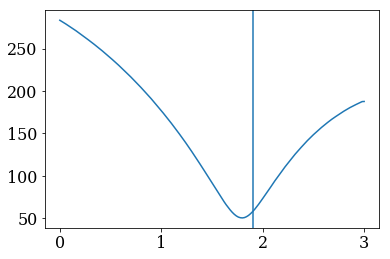

In [10]:
plot(np.linspace(0, 3, 151), R_gal3)
#plot(t3_2, R_gal3_2)

axvline(1.9)

In [11]:
orbit3_b1 = reading_Nbody('LMC3_40Mb1_ic20_new_orbit.txt')
R_gal3_b1 = orbit3_b1[0]
x_sat3_b1 = orbit3_b1[1]
y_sat3_b1 = orbit3_b1[2]
z_sat3_b1 = orbit3_b1[3]
x_gal3_b1 = orbit3_b1[4]
y_gal3_b1 = orbit3_b1[5]
z_gal3_b1 = orbit3_b1[6]
Vgal3_b1 = orbit3_b1[7]
vx_sat3_b1 = orbit3_b1[8]
vy_sat3_b1 = orbit3_b1[9]
vz_sat3_b1 = orbit3_b1[10]
vx_gal3_b1 = orbit3_b1[11]
vy_gal3_b1 = orbit3_b1[12]
vz_gal3_b1 = orbit3_b1[13]
best_values(x_sat3_b1-x_gal3_b1, y_sat3_b1-y_gal3_b1, z_sat3_b1-z_gal3_b1, vx_sat3_b1-vx_gal3_b1,
            vy_sat3_b1-vy_gal3_b1, vz_sat3_b1-vz_gal3_b1)

Dr =  [-0.918272] [ 1.183414] [ 1.062192] [ 1.83628538]
Dv =  [ 31.677488] [ 40.891472] [-13.230846] [ 53.39130092]


(array([ 1.82]),
 array([-0.081728]),
 array([-42.183414]),
 array([-29.062192]),
 array([-88.677488]),
 array([-266.891472]),
 array([ 234.230846]))

In [12]:
orbit3_b09 = reading_Nbody('LMC3_40Mb09_ic20_new_orbit.txt')
R_gal3_b09 = orbit3_b09[0]
x_sat3_b09 = orbit3_b09[1]
y_sat3_b09 = orbit3_b09[2]
z_sat3_b09 = orbit3_b09[3]
x_gal3_b09 = orbit3_b09[4]
y_gal3_b09 = orbit3_b09[5]
z_gal3_b09 = orbit3_b09[6]
Vgal3_b09 = orbit3_b09[7]
vx_sat3_b09 = orbit3_b09[8]
vy_sat3_b09 = orbit3_b09[9]
vz_sat3_b09 = orbit3_b09[10]
vx_gal3_b09 = orbit3_b09[11]
vy_gal3_b09 = orbit3_b09[12]
vz_gal3_b09 = orbit3_b09[13]
best_values(x_sat3_b09-x_gal3_b09, y_sat3_b09-y_gal3_b09, z_sat3_b09-z_gal3_b09, vx_sat3_b09-vx_gal3_b09,
            vy_sat3_b09-vy_gal3_b09, vz_sat3_b09-vz_gal3_b09)

Dr =  [ 0.154607] [-3.571613] [-5.682336] [ 6.71336467]
Dv =  [ 19.723178] [ 61.628154] [-56.069581] [ 85.6202723]


(array([ 1.82]),
 array([-1.154607]),
 array([-37.428387]),
 array([-22.317664]),
 array([-76.723178]),
 array([-287.628154]),
 array([ 277.069581]))

In [13]:
orbit3_b09 = reading_Nbody('LMC3_40Mb09_ic15_new_orbit.txt')
R_gal3_b09 = orbit3_b09[0]
x_sat3_b09 = orbit3_b09[1]
y_sat3_b09 = orbit3_b09[2]
z_sat3_b09 = orbit3_b09[3]
x_gal3_b09 = orbit3_b09[4]
y_gal3_b09 = orbit3_b09[5]
z_gal3_b09 = orbit3_b09[6]
Vgal3_b09 = orbit3_b09[7]
vx_sat3_b09 = orbit3_b09[8]
vy_sat3_b09 = orbit3_b09[9]
vz_sat3_b09 = orbit3_b09[10]
vx_gal3_b09 = orbit3_b09[11]
vy_gal3_b09 = orbit3_b09[12]
vz_gal3_b09 = orbit3_b09[13]
best_values(x_sat3_b09-x_gal3_b09, y_sat3_b09-y_gal3_b09, z_sat3_b09-z_gal3_b09, vx_sat3_b09-vx_gal3_b09,
            vy_sat3_b09-vy_gal3_b09, vz_sat3_b09-vz_gal3_b09)

Dr =  [ 5.784192] [-7.20116] [-6.398463] [ 11.23627657]
Dv =  [-3.874672] [ 54.596754] [-59.18285] [ 80.61283002]


(array([ 1.82]),
 array([-6.784192]),
 array([-33.79884]),
 array([-21.601537]),
 array([-53.125328]),
 array([-280.596754]),
 array([ 280.18285]))

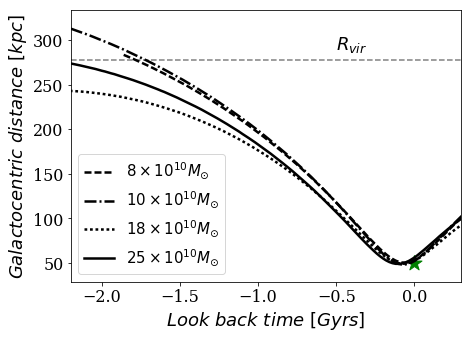

In [16]:
figure(figsize=(7,5))


plot(np.linspace(0, 3, 151)-1.86, R_gal3, label=r'$8 \times 10^{10} M_{\odot}$', ls='--', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.32, R_gal4, label=r'$10 \times 10^{10} M_{\odot}$', ls='-.', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.24, R_gal5, label=r'$18 \times 10^{10} M_{\odot}$', ls=':', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.3, R_gal6, label=r'$25 \times 10^{10} M_{\odot}$', c='k', lw=2.5)

xlim(-2.2, 0.3)
axhline(278, ls='--', c='k', alpha=0.5)
text(-0.5, 290, '$R_{vir}$', fontsize=18)

plt.scatter(0, 49.65, s=250, marker='*', c='green')
legend(fontsize=15)
xlabel('$Look\ back\ time\ [Gyrs]$', fontsize=18)
ylabel('$Galactocentric\ distance\ [kpc]$', fontsize=18)

savefig('../../../MW_anisotropy/figures/LMC_orbits.pdf', bbox_inches='tight', dpi=300)
savefig('../../../MW_anisotropy/figures/LMC_orbits.png', bbox_inches='tight', dpi=300)


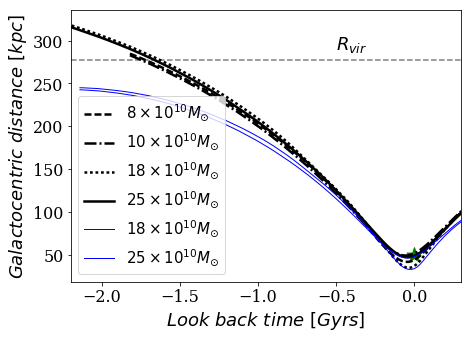

In [36]:
figure(figsize=(7,5))


plot(np.linspace(0, 3, 151)-1.82, R_gal3_b09, label=r'$8 \times 10^{10} M_{\odot}$', ls='--', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-1.82, R_gal3_b1, label=r'$10 \times 10^{10} M_{\odot}$', ls='-.', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.26, R_gal4_b09, label=r'$18 \times 10^{10} M_{\odot}$', ls=':', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.26, R_gal4_b1, label=r'$25 \times 10^{10} M_{\odot}$', c='k', lw=2.5)
plot(np.linspace(0, 3, 151)-2.14, R_gal5_b09, label=r'$18 \times 10^{10} M_{\odot}$', c='b', lw=1)
plot(np.linspace(0, 3, 151)-2.14, R_gal5_b1, label=r'$25 \times 10^{10} M_{\odot}$', c='b', lw=1)

xlim(-2.2, 0.3)
axhline(278, ls='--', c='k', alpha=0.5)
text(-0.5, 290, '$R_{vir}$', fontsize=18)

plt.scatter(0, 49.65, s=250, marker='*', c='green')
legend(fontsize=15)
xlabel('$Look\ back\ time\ [Gyrs]$', fontsize=18)
ylabel('$Galactocentric\ distance\ [kpc]$', fontsize=18)


In [20]:
## Peris  r_peri = 48.2 \pm 2.5  Salem 2015.

print(min(R_gal6)-48.2, min(R_gal5)-48.2, min(R_gal4)-48.2, min(R_gal3)-48.2)

-0.340324706044 0.0993320421771 -3.02808076611 -0.193182045483
